Question 6 Using the data from Question 3, write code to analyze the data and answer the following questions 
Note 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5% 
● Get all Pokemons that have less than 4 weaknesses 
● Get all Pokemons that have no multipliers at all 
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [2]:
#loading the json file
with open('pokedex.json') as j:
     json_data = json.load(j)
# Extracting the data array 
data_array = json_data["pokemon"]

# Converting into DataFrame
df = pd.DataFrame(data_array)
#df.drop(["id", "num"],axis=1, inplace=True )

In [3]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


In [21]:
df.describe()

,id,candy_count,spawn_chance,avg_spawns,count,seconds
count,151.000000,70.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,57.300000,0.731985,53.992603,1.165563,25799.602649
std,43.734045,48.897512,1.956376,111.156064,0.696950,23346.232069
min,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,31.250000,0.015500,1.450000,1.000000,8760.000000
50%,76.000000,50.000000,0.074000,7.200000,1.000000,16080.000000
75%,113.500000,50.000000,0.620000,55.000000,2.000000,41490.000000
max,151.000000,400.000000,15.980000,712.000000,3.000000,86280.000000


In [23]:
import plotly.express as px
fig = px.histogram(df, x="spawn_chance",nbins = 30 )
fig.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



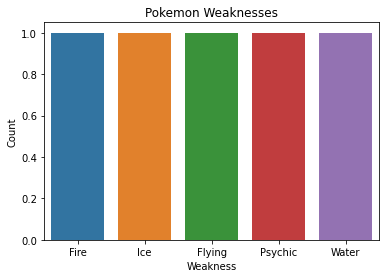

In [28]:
weaknesses = ['Fire', 'Ice', 'Flying', 'Psychic', 'Water']

# Count plot
sns.countplot(weaknesses)
plt.xlabel('Weakness')
plt.ylabel('Count')
plt.title('Pokemon Weaknesses')
plt.show()


## 1. Get all Pokemons whose spawn rate is less than 5%

In [17]:
pokemon_spawn_rate_5 = df['name'][df['spawn_chance'] < 0.5]
pokemon_spawn_rate_5

1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
5       Charizard
          ...    
146       Dratini
147     Dragonair
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 108, dtype: object

## 2. Get all Pokemons that have less than 4 weaknesses

In [22]:
pokemon_less_than_4_weaknesses = df[df['weaknesses'].apply(lambda x: len(x)) < 4]
pokemon_less_than_4_weaknesses['name']

3      Charmander
4      Charmeleon
5       Charizard
6        Squirtle
7       Wartortle
          ...    
145       Moltres
146       Dratini
147     Dragonair
149        Mewtwo
150           Mew
Name: name, Length: 102, dtype: object

## 3. Get all Pokemons that have no multipliers at all

In [9]:
for i in df['multipliers'].index:
    if (df["multipliers"][i]) == None:
        print(i, df["name"][i])

2 Venusaur
5 Charizard
8 Blastoise
11 Butterfree
14 Beedrill
17 Pidgeot
19 Raticate
21 Fearow
23 Arbok
25 Raichu
27 Sandslash
30 Nidoqueen
33 Nidoking
35 Clefable
37 Ninetales
39 Wigglytuff
41 Golbat
44 Vileplume
46 Parasect
48 Venomoth
50 Dugtrio
52 Persian
54 Golduck
56 Primeape
58 Arcanine
61 Poliwrath
64 Alakazam
67 Machamp
70 Victreebel
72 Tentacruel
75 Golem
77 Rapidash
79 Slowbro
81 Magneton
82 Farfetch'd
84 Dodrio
86 Dewgong
88 Muk
90 Cloyster
93 Gengar
94 Onix
96 Hypno
98 Kingler
100 Electrode
102 Exeggutor
104 Marowak
105 Hitmonlee
106 Hitmonchan
107 Lickitung
109 Weezing
111 Rhydon
112 Chansey
113 Tangela
114 Kangaskhan
116 Seadra
118 Seaking
120 Starmie
121 Mr. Mime
122 Scyther
123 Jynx
124 Electabuzz
125 Magmar
126 Pinsir
127 Tauros
129 Gyarados
130 Lapras
131 Ditto
133 Vaporeon
134 Jolteon
135 Flareon
136 Porygon
138 Omastar
140 Kabutops
141 Aerodactyl
142 Snorlax
143 Articuno
144 Zapdos
145 Moltres
148 Dragonite
149 Mewtwo
150 Mew


## 4. Get all Pokemons that do not have more than 2 evolutions

In [12]:
def count_evolution(row):
    count = 0
    if isinstance(row['next_evolution'], list):
        count += len(row['next_evolution'])
    if isinstance(row['prev_evolution'], list):
        count += len(row['prev_evolution'])
    return count

df['count'] = df.apply(count_evolution, axis=1)
for i in df["count"].index:
    if df["count"][i] <= 2:
        print(df["name"][i])

Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran â™€ (Female)
Nidorina
Nidoqueen
Nidoran â™‚ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Zubat
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan
Horsea


## 5. Get all Pokemons whose spawn time is less than 300 seconds.

In [15]:
df["spawn_time"].replace("N/A", 0, inplace=True)
def convert_to_seconds(time_str):
    if pd.isnull(time_str) or time_str == "" or time_str == 0:
        return time_str
    else:
        time_components = str(time_str).split(":")
        seconds = int(time_components[0]) * 3600 + int(time_components[1]) * 60
        return seconds

df['seconds'] = df['spawn_time'].apply(convert_to_seconds)
pokemon_spawn_time_300 = df['name'][df['seconds'] < 300]
pokemon_spawn_time_300

131       Ditto
143    Articuno
144      Zapdos
145     Moltres
149      Mewtwo
150         Mew
Name: name, dtype: object

## 6. Get all Pokemon who have more than two types of capabilities

In [16]:
pokemon_2 = df[df['type'].apply(lambda x: len(x) > 2)]
pokemon_2

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,count,seconds


#### No pokemon has more than two capabilities